In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wintersbae","key":"55045f5bfb861c2c41d471223daa8279"}'}

In [2]:
!pip install kaggle
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
rm: cannot remove '/root/.kaggle': No such file or directory


In [3]:
!kaggle datasets download -d cnic92/200-financial-indicators-of-us-stocks-20142018

 61% 9.00M/14.8M [00:00<00:00, 68.1MB/s]
100% 14.8M/14.8M [00:00<00:00, 95.4MB/s]


In [4]:
ls

200-financial-indicators-of-us-stocks-20142018.zip  kaggle.json  sample_data/


In [5]:
!unzip \*.zip  && rm *.zip

Archive:  200-financial-indicators-of-us-stocks-20142018.zip
  inflating: 2014_Financial_Data.csv  
  inflating: 2015_Financial_Data.csv  
  inflating: 2016_Financial_Data.csv  
  inflating: 2017_Financial_Data.csv  
  inflating: 2018_Financial_Data.csv  


In [6]:
import pandas as pd
df = pd.read_csv('2018_Financial_Data.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


In [7]:
class_col = df.pop('Class')

In [8]:
df.isna().sum()

Revenue                  46
Revenue Growth          139
Cost of Revenue         185
Gross Profit             64
R&D Expenses            237
                       ... 
Debt Growth             264
R&D Expense Growth      259
SG&A Expenses Growth    248
Sector                    0
2019 PRICE VAR [%]        0
Length: 223, dtype: int64

In [9]:
df = df.drop(df[df['Revenue Growth'].isna()].index)

In [10]:
df.isna().sum().sort_values(ascending=False)

cashConversionCycle                           4247
operatingCycle                                4247
shortTermCoverageRatios                       1791
10Y Shareholders Equity Growth (per Share)    1557
dividendPayoutRatio                           1526
                                              ... 
Gross Margin                                     0
Earnings before Tax                              0
Operating Income                                 0
Gross Profit                                     0
2019 PRICE VAR [%]                               0
Length: 223, dtype: int64

In [11]:
import numpy as np

print(np.unique(df['operatingProfitMargin'].values))

[ 1. nan]


In [12]:
df = df.drop(['cashConversionCycle', 'operatingCycle', 'operatingProfitMargin'], axis=1)

In [13]:
df.isna().sum().sort_values(ascending=False)

shortTermCoverageRatios                       1791
10Y Shareholders Equity Growth (per Share)    1557
dividendPayoutRatio                           1526
priceEarningsToGrowthRatio                    1526
10Y Net Income Growth (per Share)             1514
                                              ... 
Gross Margin                                     0
Earnings before Tax                              0
Operating Income                                 0
Gross Profit                                     0
2019 PRICE VAR [%]                               0
Length: 220, dtype: int64

In [15]:
sec_col = df.pop('Sector')

In [16]:
Q1 = df['Revenue Growth'].quantile(0.25)
Q3 = df['Revenue Growth'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

0.1885


In [17]:
df_clean = df.copy()
df_clean = df_clean[df_clean['Revenue Growth'] > (Q1 - 1.5 * IQR)]
df_clean = df_clean[df_clean['Revenue Growth'] < (Q3 + 1.5 * IQR)]

In [18]:
df.shape

(4253, 219)

In [19]:
df_clean.shape

(3674, 219)

In [20]:
df = df_clean

In [ ]:
# for column in df.columns:
#     df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    

In [21]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [22]:
df.isna().sum().sort_values(ascending=False)

Revenue                      0
Free Cash Flow Yield         0
PE ratio                     0
Price to Sales Ratio         0
POCF ratio                   0
                            ..
priceToBookRatio             0
priceToSalesRatio            0
priceEarningsRatio           0
priceToFreeCashFlowsRatio    0
2019 PRICE VAR [%]           0
Length: 219, dtype: int64

In [23]:
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

In [24]:
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('Revenue Growth')
test_labels = test_features.pop('Revenue Growth')

In [25]:
import tensorflow as tf

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)                        
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.optimizers.Adam(),
    metrics = ['mae']
)

history = model.fit(
    train_features, 
    train_labels, 
    validation_split=0.2,
    epochs=150)

Epoch 1/150
74/74 [==============================] - 1s 6ms/step - loss: 0.2268 - mae: 0.2268 - val_loss: 0.1680 - val_mae: 0.1680
Epoch 2/150
74/74 [==============================] - 0s 3ms/step - loss: 0.1784 - mae: 0.1784 - val_loss: 0.1419 - val_mae: 0.1419
Epoch 3/150
74/74 [==============================] - 0s 3ms/step - loss: 0.1217 - mae: 0.1217 - val_loss: 0.1245 - val_mae: 0.1245
Epoch 4/150
74/74 [==============================] - 0s 3ms/step - loss: 0.0971 - mae: 0.0971 - val_loss: 0.1080 - val_mae: 0.1080
Epoch 5/150
74/74 [==============================] - 0s 3ms/step - loss: 0.0793 - mae: 0.0793 - val_loss: 0.0991 - val_mae: 0.0991
Epoch 6/150
74/74 [==============================] - 0s 4ms/step - loss: 0.0692 - mae: 0.0692 - val_loss: 0.0984 - val_mae: 0.0984
Epoch 7/150
74/74 [==============================] - 0s 4ms/step - loss: 0.0645 - mae: 0.0645 - val_loss: 0.0927 - val_mae: 0.0927
Epoch 8/150
74/74 [==============================] - 0s 3ms/step - loss: 0.0583 - m

In [26]:
print(test_labels.max())
print(test_labels.min())

0.4637
-0.278


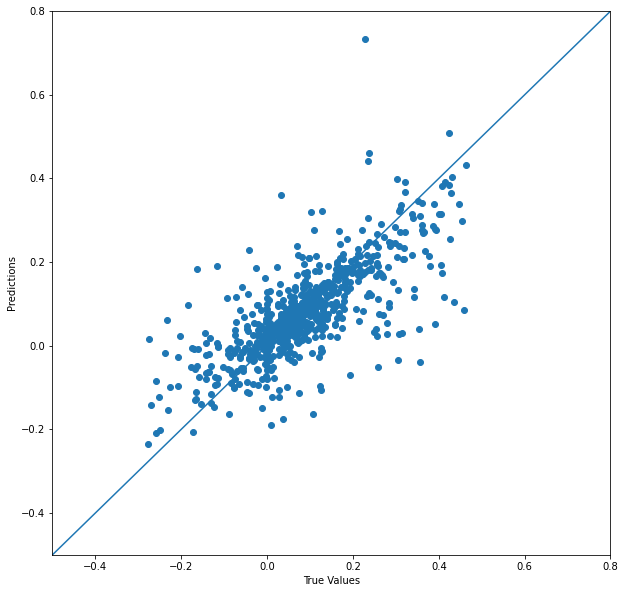

In [27]:
import matplotlib.pyplot as plt

test_pred = model.predict(test_features).flatten()

plt.figure(figsize=(10, 10))

plt.scatter(test_labels, test_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

lims = [-0.5, 0.8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [28]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.4 MB/s 
     |████████████████████████████████| 133 kB 38.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=d78bdf279e6aae286041c4347357918a74b01e94371739dafb37bf1a95048a93
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [38]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [41]:
print(df.corr()['Revenue Growth'])

Revenue                        0.008057
Revenue Growth                 1.000000
Cost of Revenue                0.013945
Gross Profit                  -0.016973
R&D Expenses                   0.024828
                                 ...   
Book Value per Share Growth    0.058418
Debt Growth                   -0.008371
R&D Expense Growth             0.035733
SG&A Expenses Growth           0.049797
2019 PRICE VAR [%]             0.013143
Name: Revenue Growth, Length: 219, dtype: float64


In [29]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, scoring='neg_mean_absolute_error', random_state=1).fit(train_features, train_labels)

In [37]:
eli5.show_weights(perm, top=200, feature_names = train_features.columns.tolist())

Weight,Feature
0.0602 ± 0.0032,Gross Profit Growth
0.0113 ± 0.0005,Gross Margin
0.0066 ± 0.0004,SG&A Expenses Growth
0.0065 ± 0.0003,3Y Revenue Growth (per Share)
0.0063 ± 0.0006,grossProfitMargin
0.0051 ± 0.0005,Intangibles to Total Assets
0.0048 ± 0.0002,10Y Shareholders Equity Growth (per Share)
0.0048 ± 0.0003,3Y Operating CF Growth (per Share)
0.0044 ± 0.0005,assetTurnover
0.0043 ± 0.0004,10Y Revenue Growth (per Share)


In [36]:
cols = [
  'Gross Profit Growth',
  'Gross Margin',
  'grossProfitMargin',
  'Intangibles to Total Assets',
  'Net Income',
  'assetTurnover',
  'Revenue',
  'Interest Expense',
  'Debt to Assets',
  'R&D Expenses',
  'SG&A Expense'
]

df_red = df[cols]
df_red.head()

,Gross Profit Growth,Gross Margin,grossProfitMargin,Intangibles to Total Assets,Net Income,assetTurnover,Revenue,Interest Expense,Debt to Assets,R&D Expenses,SG&A Expense
0,0.1115,1.0000,1.000000,0.6660,1.173100e+10,0.375499,9.450700e+10,3.542000e+09,0.4440,0.000000e+00,6.482200e+10
1,0.0564,0.4847,0.484729,0.3150,1.609000e+09,0.179342,1.414400e+10,1.917000e+09,0.4733,0.000000e+00,6.010000e+08
2,0.1187,0.6173,0.617336,0.2841,2.105300e+10,0.553660,7.084800e+10,-1.260000e+08,0.2060,1.354300e+10,6.750000e+09
3,0.7216,0.2151,0.215056,0.1484,-2.235500e+10,0.390955,1.216150e+11,5.059000e+09,0.3330,0.000000e+00,1.811100e+10
4,0.0446,1.0000,1.000000,0.0293,2.814700e+10,0.038754,9.124700e+10,0.000000e+00,0.1854,0.000000e+00,5.338100e+10


In [43]:
Q1 = df_red.quantile(0.25)
Q3 = df_red.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

Gross Profit Growth            1.795250e-01
Gross Margin                   5.159000e-01
grossProfitMargin              5.018137e-01
Intangibles to Total Assets    2.839500e-01
Net Income                     2.388313e+08
assetTurnover                  8.314763e-01
Revenue                        2.855640e+09
Interest Expense               6.609075e+07
Debt to Assets                 3.473050e-01
R&D Expenses                   1.073025e+07
SG&A Expense                   4.690550e+08
dtype: float64


In [44]:
df_tmp = df_red.copy()
no = 0
for col in df_tmp.columns:
  df_tmp = df_tmp[df_tmp[col] > (Q1[no] - 1.5 * IQR[no])]
  df_tmp = df_tmp[df_tmp[col] < (Q3[no] + 1.5 * IQR[no])]
  no += 1

In [46]:
df_red.shape

(3674, 11)

In [45]:
df_tmp.shape

(1884, 11)

In [54]:
train_features_red = df_red.sample(frac=0.8, random_state=0)
test_features_red = df_red.drop(train_features_red.index)

In [55]:
import tensorflow as tf

normalizer_red = tf.keras.layers.Normalization(axis=-1)
normalizer_red.adapt(np.array(train_features_red))

model_red = tf.keras.Sequential([
    normalizer_red,
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)                        
])

model_red.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.optimizers.Adam(),
    metrics = ['mae']
)

history = model_red.fit(
    train_features_red, 
    train_labels, 
    validation_split=0.2,
    epochs=200)

Epoch 1/200
74/74 [==============================] - 1s 5ms/step - loss: 0.1212 - mae: 0.1212 - val_loss: 0.1074 - val_mae: 0.1074
Epoch 2/200
74/74 [==============================] - 0s 3ms/step - loss: 0.0756 - mae: 0.0756 - val_loss: 0.0791 - val_mae: 0.0791
Epoch 3/200
74/74 [==============================] - 0s 3ms/step - loss: 0.0626 - mae: 0.0626 - val_loss: 0.0713 - val_mae: 0.0713
Epoch 4/200
74/74 [==============================] - 0s 4ms/step - loss: 0.0561 - mae: 0.0561 - val_loss: 0.0619 - val_mae: 0.0619
Epoch 5/200
74/74 [==============================] - 0s 4ms/step - loss: 0.0555 - mae: 0.0555 - val_loss: 0.0663 - val_mae: 0.0663
Epoch 6/200
74/74 [==============================] - 0s 3ms/step - loss: 0.0555 - mae: 0.0555 - val_loss: 0.0611 - val_mae: 0.0611
Epoch 7/200
74/74 [==============================] - 0s 4ms/step - loss: 0.0501 - mae: 0.0501 - val_loss: 0.0569 - val_mae: 0.0569
Epoch 8/200
74/74 [==============================] - 0s 3ms/step - loss: 0.0493 - m

In [56]:
print(test_labels.max())
print(test_labels.min())

0.4637
-0.278


<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

(-0.5, 0.8)

(-0.5, 0.8)

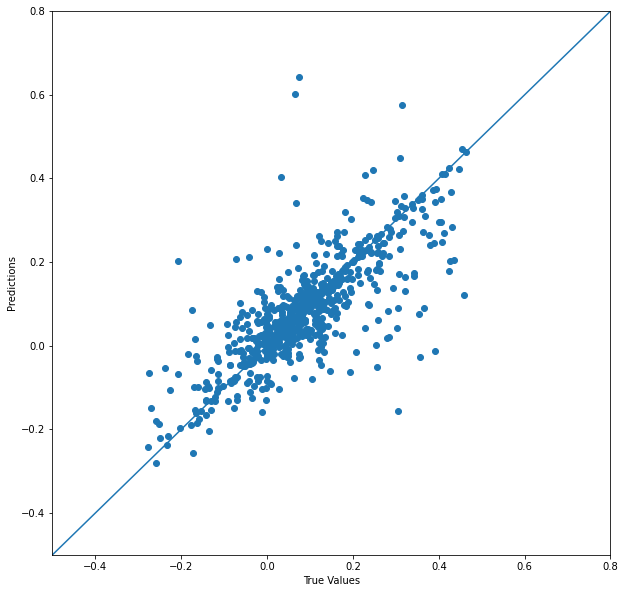

In [57]:
import matplotlib.pyplot as plt

test_red_pred = model_red.predict(test_features_red).flatten()

plt.figure(figsize=(10, 10))

plt.scatter(test_labels, test_red_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

lims = [-0.5, 0.8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [58]:
from google.colab import files

df_red.to_csv('2018_Financial_Data_Cleaned.csv') 
files.download('2018_Financial_Data_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>